## Задание №1
Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Задание №2
На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

In [2]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,1
1535,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,6,1
1448,6.9,0.58,0.01,1.9,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,5,0
1335,6.6,0.58,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6,1
516,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,6,1
583,12.0,0.28,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,7,1
410,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6,1
1572,7.3,0.69,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5,0
656,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5,0
1051,8.5,0.46,0.59,1.4,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5,0


## Задание №3
Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока.
Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [4]:
df.groupby('quality')[df.columns].mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
quality,,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.0,0.0
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,4.0,0.0
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,5.0,0.0
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,6.0,1.0
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,7.0,1.0
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.0,1.0


Вино с качеством 5 и 6 появляется в выборке чаще всего.

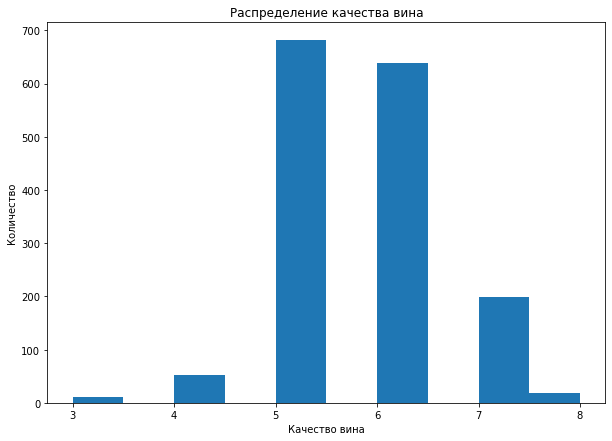

In [5]:
import matplotlib.pyplot as plt
data = df['good'].value_counts()
plt.figure(figsize = (10,7))
plt.hist(df['quality'], bins=10)
plt.title('Распределение качества вина')
plt.xlabel('Качество вина')
plt.ylabel('Количество')
plt.show()

Летучая кислотность уменьшается с повышением качества

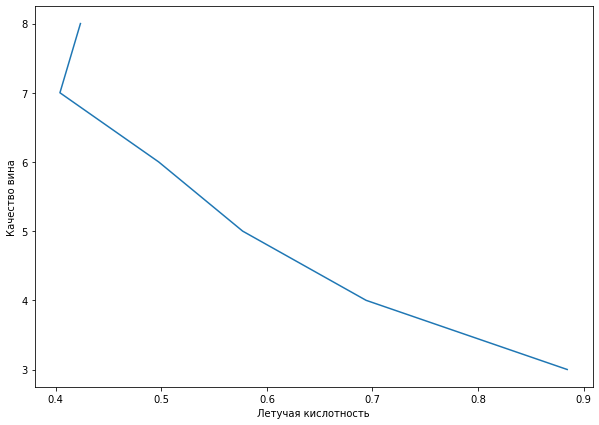

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920
5,8,0.423333


In [18]:
vol_acid = df.groupby('quality')['volatile acidity'].mean().reset_index()
plt.figure(figsize=(10,7))
plt.plot(vol_acid['volatile acidity'], vol_acid['quality'])
plt.ylabel('Качество вина')
plt.xlabel('Летучая кислотность')
plt.show()

Конценнтрация лимонной кислоты увеличивается с повышением качества

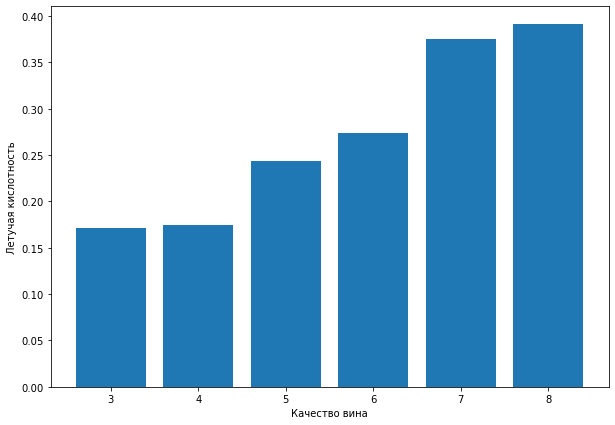

In [19]:
cit_acid = df.groupby('quality')['citric acid'].mean().reset_index()
plt.figure(figsize=(10,7))
plt.bar(cit_acid['quality'], cit_acid['citric acid'])
plt.xlabel('Качество вина')
plt.ylabel('Лимонная кислота')
plt.show()

Для качества 8 и 9 соотношение лимонной кислоты и летучей кислотности почти равно 1

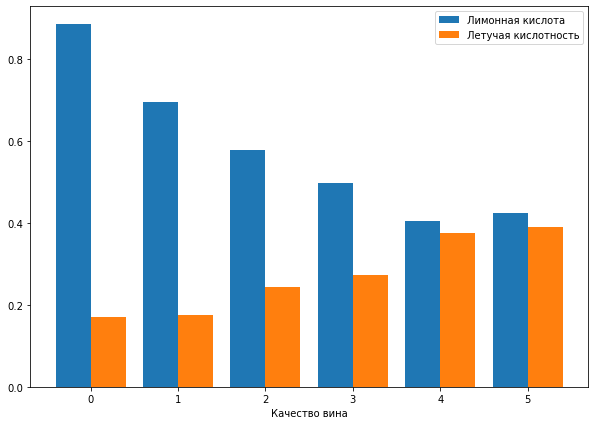

In [26]:
vol_cit = vol_acid.merge(cit_acid, on='quality')
n_t = np.arange(len(vol_cit['volatile acidity']))
offset = 0.2
plt.figure(figsize = (10, 7))
plt.bar(n_t - offset, vol_cit['volatile acidity'], width = 0.4)
plt.bar(n_t + offset, vol_cit['citric acid'], width = 0.4)
plt.legend(['Лимонная кислота', 'Летучая кислотность'])
plt.xlabel('Качество вина')
plt.show()

Содержание сульфатов для лучшего качества увеличелось в 1,5 раза по сравнению с худшим качеством

In [45]:
data = df.groupby('quality')[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']].mean().reset_index().drop('quality', axis=1)
data

,volatile acidity,citric acid,chlorides,sulphates
0,0.884500,0.171000,0.122500,0.570000
1,0.693962,0.174151,0.090679,0.596415
2,0.577041,0.243686,0.092736,0.620969
3,0.497484,0.273824,0.084956,0.675329
4,0.403920,0.375176,0.076588,0.741256
5,0.423333,0.391111,0.068444,0.767778


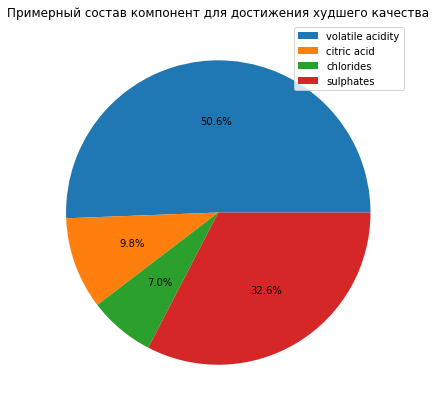

In [57]:
data_bad = data.head(1).transpose().unstack()
plt.figure(figsize = (10,7))
plt.pie(data_bad, autopct='%1.1f%%')
plt.legend(['volatile acidity', 'citric acid', 'chlorides', 'sulphates'])
plt.title('Примерный состав компонент для достижения худшего качества')
plt.show()

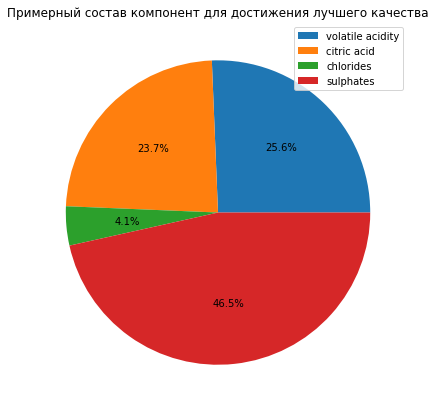

In [56]:
data_good = data.tail(1).transpose().unstack()
plt.figure(figsize = (10,7))
plt.pie(data_good, autopct='%1.1f%%')
plt.legend(['volatile acidity', 'citric acid', 'chlorides', 'sulphates'])
plt.title('Примерный состав компонент для достижения лучшего качества')
plt.show()

50% качественного вина содержит от 10 до 12 ед. алкоголя, тогда как 50% некачественного от 9,5 до 10,5

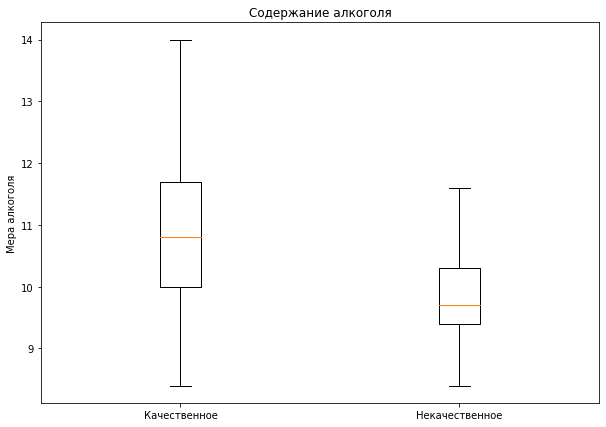

In [83]:
data1 = df['alcohol'].loc[df['good']==1]
data2 = df['alcohol'].loc[df['good']==0]
plt.figure(figsize = (10,7))
plt.boxplot([data1, data2], showfliers = False)
plt.title('Содержание алкоголя')
plt.ylabel('Мера алкоголя')
plt.xticks([1, 2],['Качественное', 'Некачественное'])

plt.show()

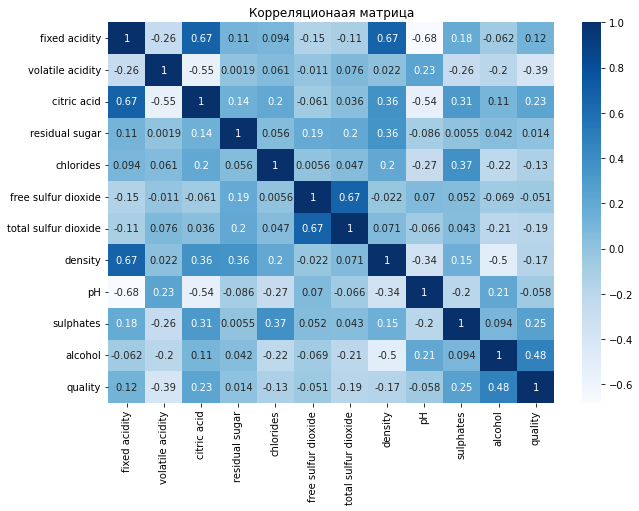

In [86]:
import seaborn as sns
# df = df.drop(columns=['good'])
correlation = df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()